## Data Visualization | Canada Immigration Data 1980 -2013 | LINE PLOTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("02 Canada Immigration Clean Data.csv")
print("Data read into pandas dataframe")

Data read into pandas dataframe


In [3]:
df.head()

,Unnamed: 0,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df.drop("Unnamed: 0", axis =1,inplace =True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's set the Country column as Index.

In [5]:
df.set_index('Country', inplace =True)
df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:


In [ ]:
years = list(map(str, range(1980,2014)))
years

### Line Plots (Series/Dataframe) <a id="4"></a> <br> 
A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments.<br>
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.


**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

First, we will extract the data series for Haiti.


In [9]:
haiti =df.loc['Haiti', years]
haiti.head(3)

1980    1666
1981    3692
1982    3498
Name: Haiti, dtype: object

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). <br>

Let's label the x and y axis using `plt.title()`, `plt.ylabel()`, and `plt.xlabel()` as follows:


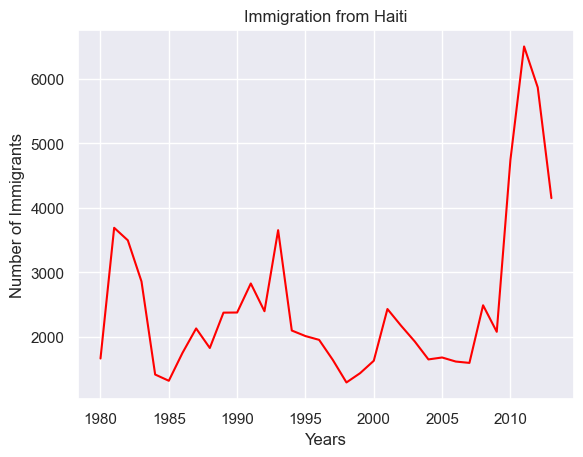

In [16]:
haiti.plot(kind ='line', color ='red')
plt.title("Immigration from Haiti")
plt.ylabel("Number of Immigrants")
plt.xlabel('Years')

plt.show()

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the `plt.text()` method.<br>
<br>
However, notice that years are of type *string*. Let's change the type of the index values to *integer* first.

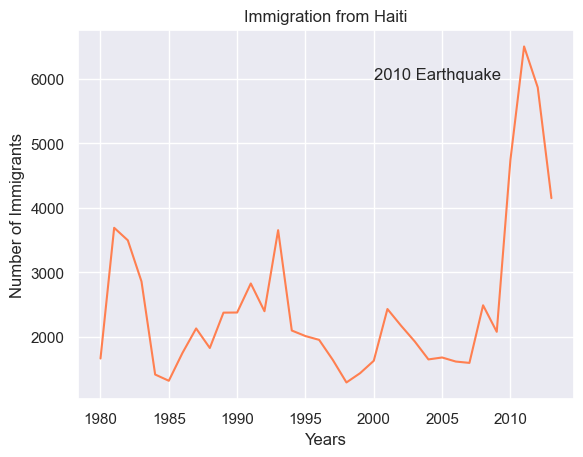

In [17]:
haiti.index = haiti.index.map(int)
haiti.plot(kind ='line', color ='coral')

plt.title("Immigration from Haiti")
plt.ylabel("Number of Immigrants")
plt.xlabel('Years')

plt.text(2000, 6000, '2010 Earthquake') # plt.text(x, y, label)
plt.show()

Let's compare the number of immigrants from India and China from 1980 to 2013.


In [18]:
df_CI = df.loc[['India','China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.

In [23]:
df_CI = df_CI.transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


*Note*: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?

That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below. 

In [30]:
print(type(haiti))
print(type(df_CI))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.


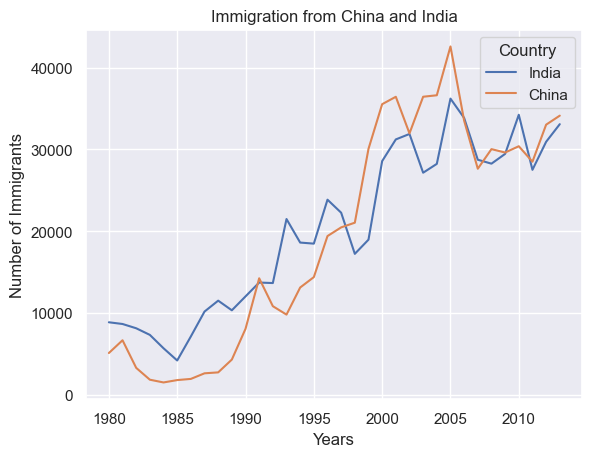

In [26]:
df_CI.index = df_CI.index.map(int) #change the index to type 'int'
df_CI.plot(kind ='line')

plt.title("Immigration from China and India")
plt.ylabel("Number of Immigrants")
plt.xlabel('Years')
plt.show()

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.


Let's compare the trend of top 5 countries that contributed the most to immigration to Canada.


In [45]:
df.sort_values(by ='Total', axis =0, ascending =False, inplace =True)
top_5C =df.head()
top_5C

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


We need to transpose the dataframe.

In [46]:
top_5C = top_5C[years].transpose()
top_5C

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [47]:
print(type(top_5C.index))

<class 'pandas.core.indexes.base.Index'>


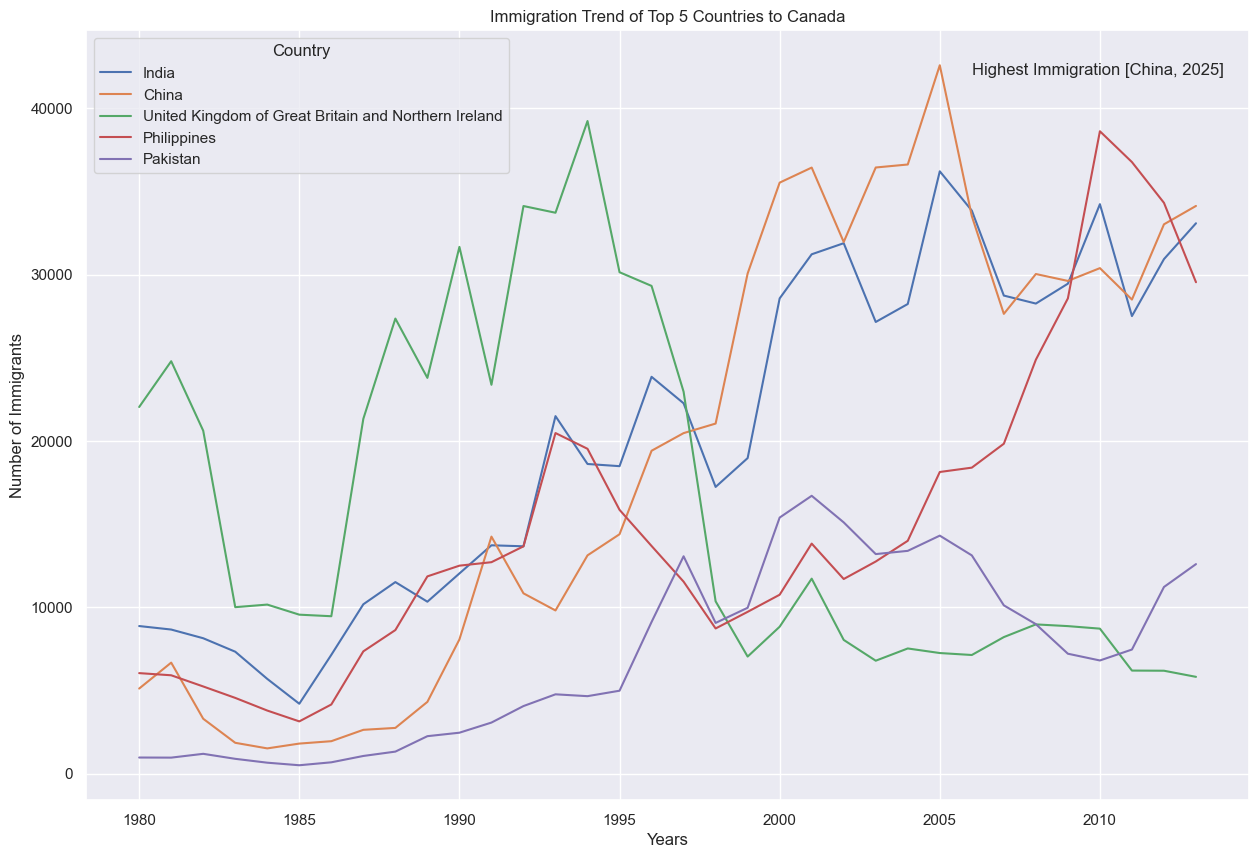

In [55]:
# change the index (years) to type "int" for plotting
top_5C.index = top_5C.index.map(int) 
top_5C.plot(kind ='line', figsize =(15,10))

plt.title("Immigration Trend of Top 5 Countries to Canada")
plt.ylabel("Number of Immigrants")
plt.xlabel('Years')
plt.text(2006, 42000, "Highest Immigration [China, 2025]")
plt.show()



## <h3 align="center"> Data Source © IBM Corporation 2020. <h3/>
## <h3 align="center"> Data Analysis and Visualization by LOVISH GARLANI. <h3/>